# Dijkstra algorithm benchmarks

In [13]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams['figure.dpi'] = 300

In [14]:
data = json.load(open('../results/benchmark_dijkstra_o2.json'))
raw = pd.DataFrame(data['benchmarks'])
raw.rename({'per_family_instance_index': 'data_size', 'family_index': 'benchmark_name'}, axis=1, inplace=True)
raw['data_size'] = raw['data_size'].replace(0, '9 vertices 49 edges')
raw['data_size'] = raw['data_size'].replace(1, '93 vertices 785 edges')
raw['data_size'] = raw['data_size'].replace(2, '1015 vertices 11,003 edges')
raw['data_size'] = raw['data_size'].replace(3, '11,397 vertices 150,645 edges')
raw['data_size'] = raw['data_size'].replace(4, '130,228 vertices 2,032,536 edges')
raw['data_size'] = raw['data_size'].replace(5, '1,505,785 vertices 27,130,349 edges')

raw['benchmark_name'] = raw['benchmark_name'].replace(0, 'BST')
raw['benchmark_name'] = raw['benchmark_name'].replace(1, 'Vec_PQ')
raw['benchmark_name'] = raw['benchmark_name'].replace(2, 'SortedVec')
raw['benchmark_name'] = raw['benchmark_name'].replace(3, 'UnsortedVec')

benchmarks = raw.pivot_table('cpu_time', ['data_size', ], 'benchmark_name')
benchmarks = benchmarks.reindex(['9 vertices 49 edges', '93 vertices 785 edges', '1015 vertices 11,003 edges', '11,397 vertices 150,645 edges', '130,228 vertices 2,032,536 edges', '1,505,785 vertices 27,130,349 edges'], axis=0)
benchmarks.replace(np.nan, np.inf, inplace=True)
pd.options.display.float_format = "{:,.3f}".format
benchmarks

benchmark_name,BST,SortedVec,UnsortedVec,Vec_PQ
data_size,,,,
9 vertices 49 edges,0.002,0.001,0.001,0.001
93 vertices 785 edges,0.012,0.004,0.006,0.004
"1015 vertices 11,003 edges",0.242,0.240,0.466,0.122
"11,397 vertices 150,645 edges",3.311,16.201,41.622,1.967
"130,228 vertices 2,032,536 edges",61.439,"1,816.582","4,549.314",43.350
"1,505,785 vertices 27,130,349 edges","1,066.411","228,969.918","529,877.968",774.015


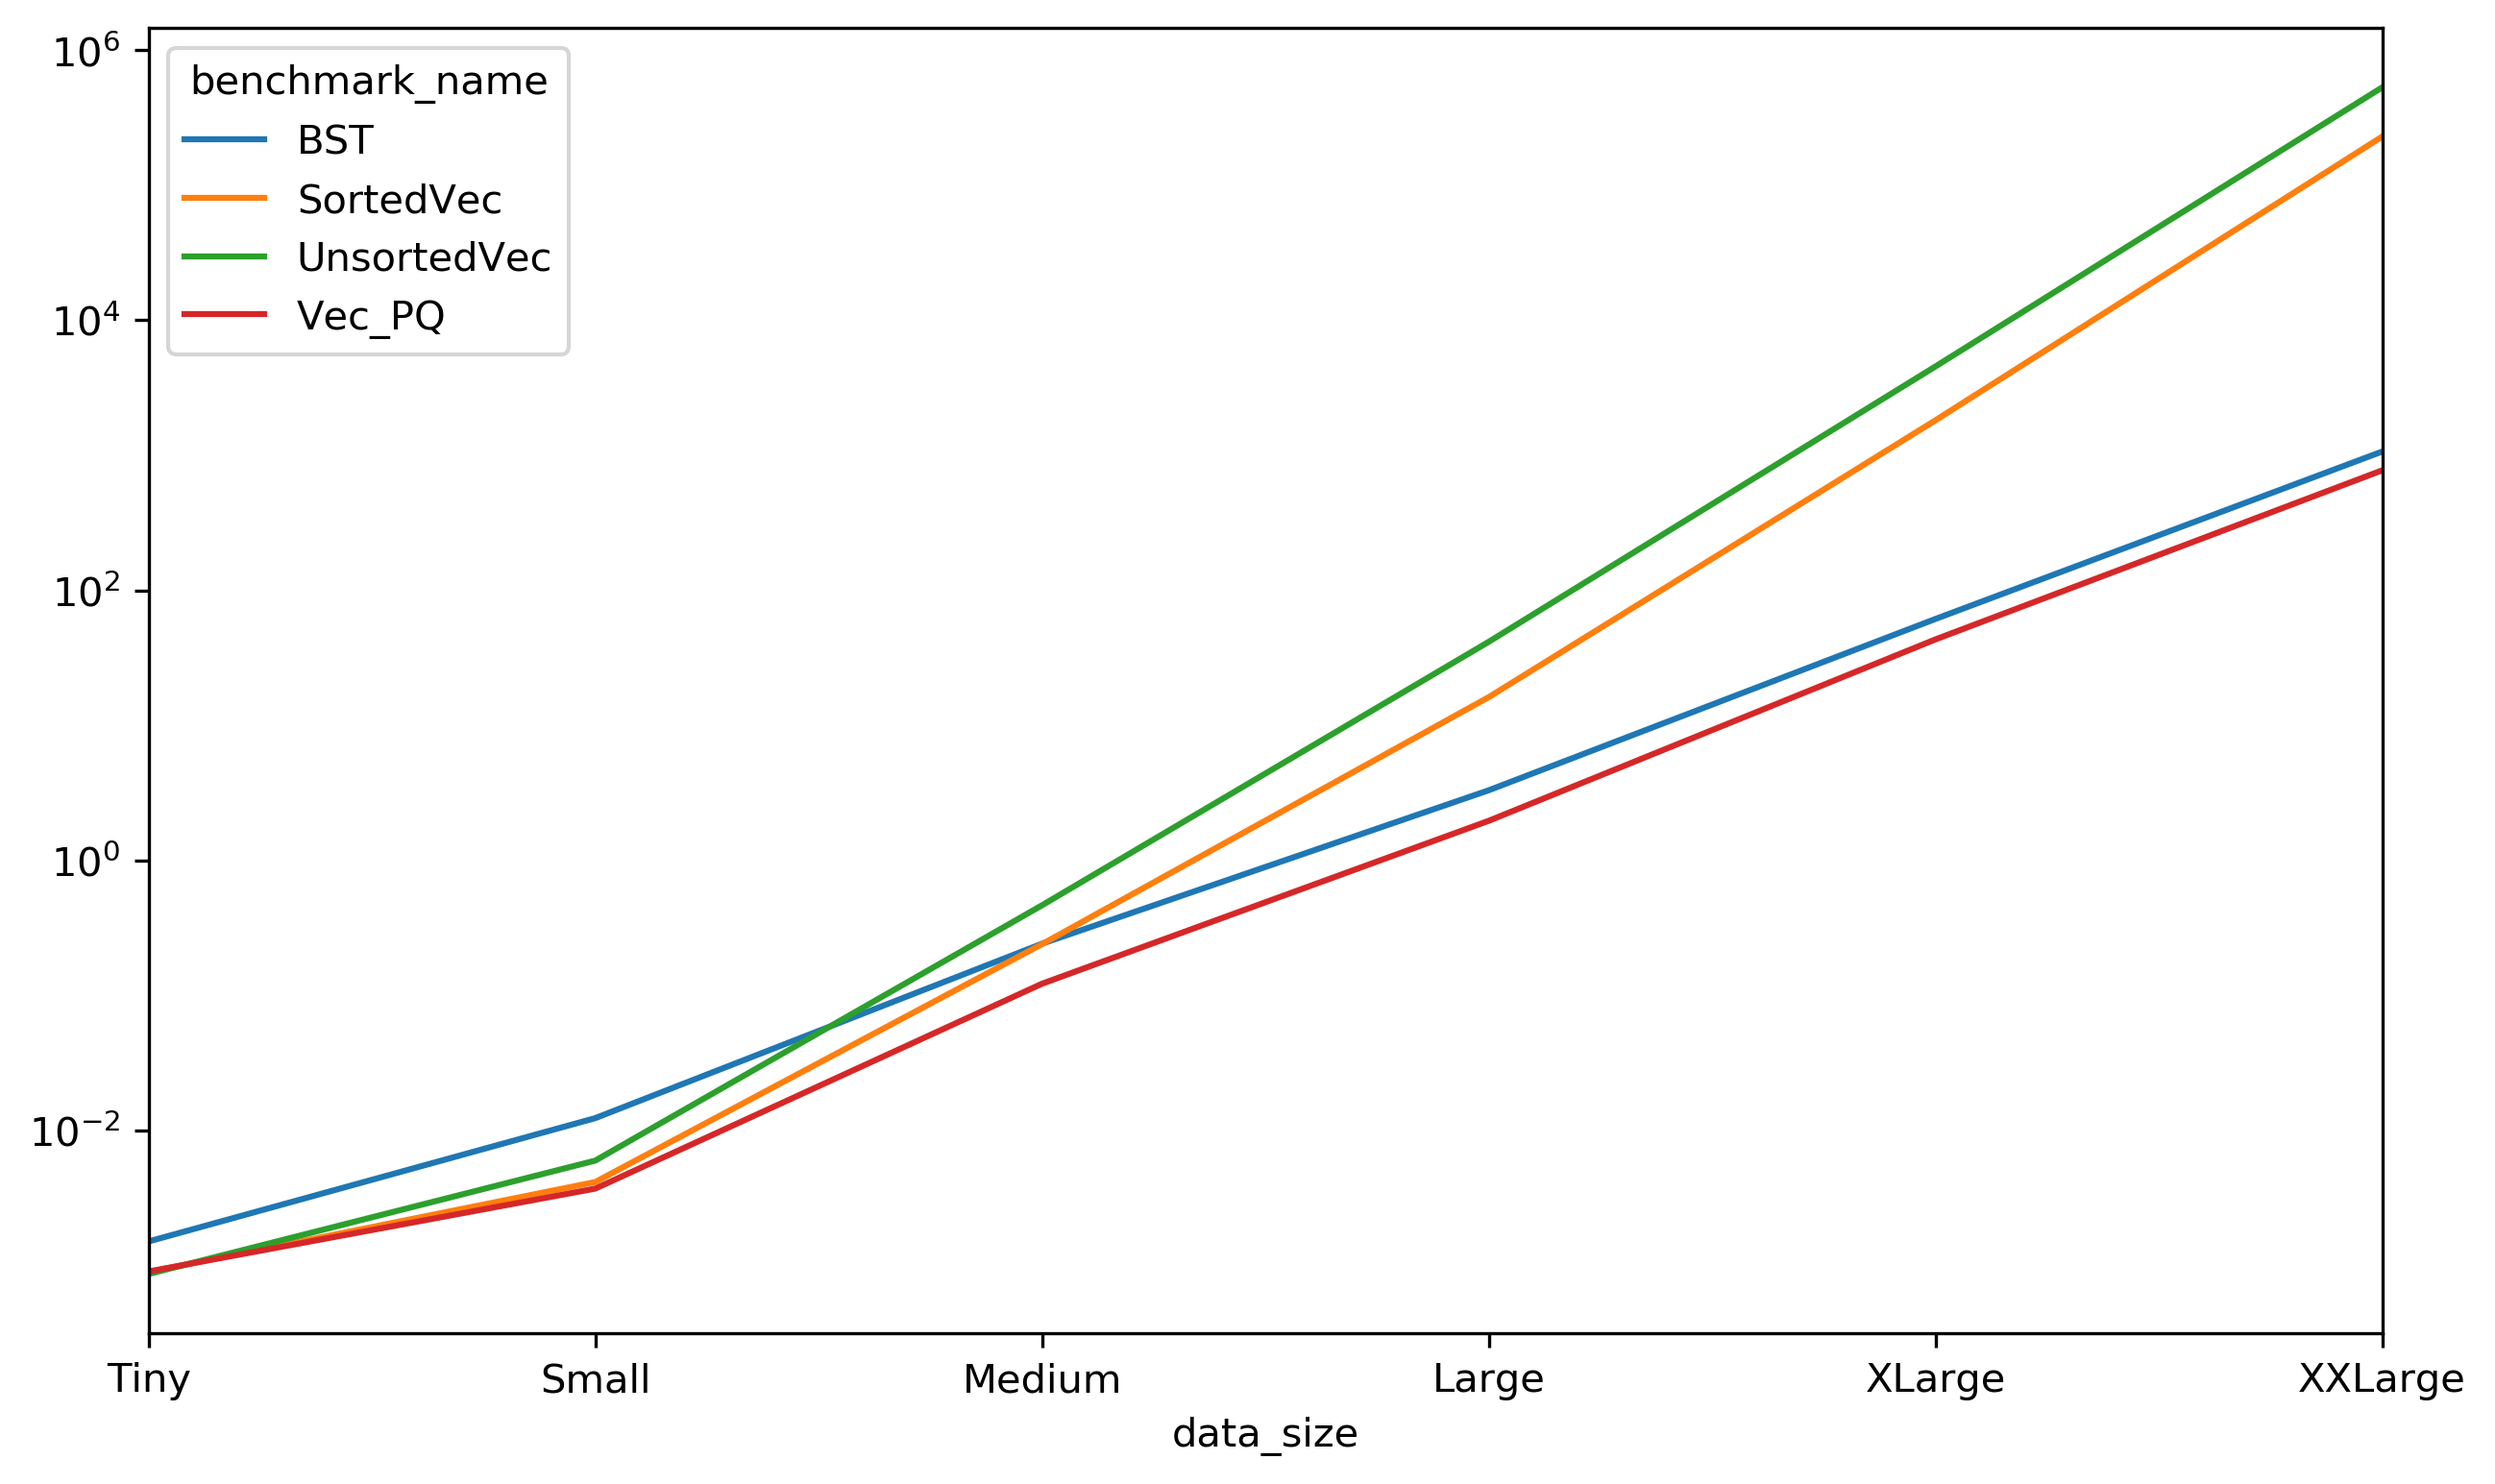

In [17]:
ax = benchmarks.plot()
ax.set_yscale('log')
ax.set_xticklabels(['Tiny','Small','Medium','Large','XLarge','XXLarge'])
plt.show()